In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('train.csv', usecols = ['descripcion'])

In [3]:
#### Funciones auxiliares ####

def get_frequency(palabras):
    spanish_stemmer = SnowballStemmer('spanish')

    distancias = {}
    apariciones = {}

    for palabra in palabras:
        raiz = spanish_stemmer.stem(palabra)
        distancias[raiz] = distancias.get(raiz,{}) #get_closest_word(raiz, distances.get(stemmed_word, palabra), palabra)
        distancias[raiz][palabra] = distancias[raiz].get(palabra, 0) + 1
        apariciones[raiz] = apariciones.get(raiz, 0) + 1
    
    representantes = {}
    for raiz in apariciones:
        representantes[raiz] = max(list(distancias[raiz].items()), key = lambda x:x[1])[0]
              
    return {representantes[raiz]:apariciones[raiz] for raiz in distancias}

def get_descripciones_como_texto(df):
    palabras = []
    for texto in list(df['descripcion']):
        texto = str(texto)
        for palabra in texto.split():
            aux = ''
            for letra in palabra:
                if letra.isalpha():
                    aux+=letra
            if aux:
                palabras.append(aux)
    return palabras


# Filtrado de palabras

In [4]:
stop_words_sp = set(stopwords.words('spanish'))
stop_words_en = set(stopwords.words('english'))
stopwords = stop_words_sp | stop_words_en
stopwords.add('para')
spanish_stemmer = SnowballStemmer('spanish')
stopwords = set(map(spanish_stemmer.stem, stopwords))

palabras = get_descripciones_como_texto(df)

frecuencias = get_frequency(palabras)
palabras_filtradas = dict(filter(lambda k:spanish_stemmer.stem(k[0].lower()) not in stopwords, frecuencias.items()))

# Generacion de Wordcloud

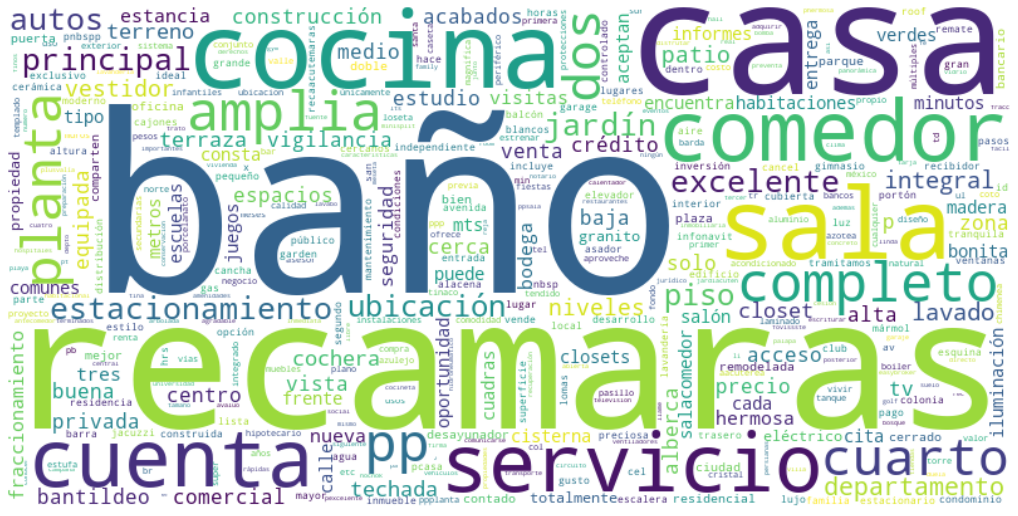

In [5]:
wordcloud = WordCloud(width=800,height=400, max_words=400, background_color="white").generate_from_frequencies(palabras_filtradas)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('./figs/wordcloud_basica.png')
plt.show()

# Generacion de Wordcloud bandera

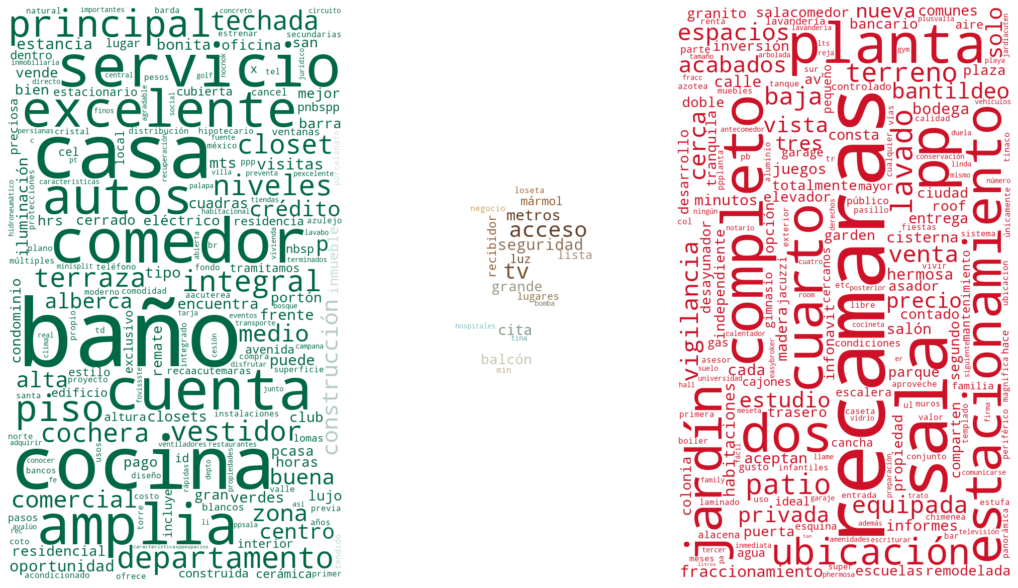

In [7]:
mask = np.array(Image.open("mexico.png"))
wordcloud = WordCloud(width=800,height=400, max_words=400, mode="RGBA", background_color="white", mask = mask).generate_from_frequencies(palabras_filtradas)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('./figs/wordcloud_mexico.png')
plt.show()